In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import random
import os
from tensorflow.python.framework import ops
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.utils import to_categorical, normalize 
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
import h5py


/home/dheeraj/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
train_dir="/media/dheeraj/9A26F0CB26F0AA01/WORK/jupyter_files/PlantDiseaseDetection/train/train"

In [3]:
test_dir="/media/dheeraj/9A26F0CB26F0AA01/WORK/jupyter_files/PlantDiseaseDetection/test/test"

In [4]:
def label_img_chutiya(img):
    word_label = img[0]
  
    if word_label == 'h': return 0
    
    elif word_label == 'b': return 1
    elif word_label == 'v': return 2
    elif word_label == 'l': return 3

In [5]:
print(os.listdir(train_dir))
for img in os.listdir(train_dir):
    path = os.path.join(train_dir,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    #img_array=cv2.imread(img)  #converting the photo to greyscale
    #plt.imshow(img)
    #plt.show()
    break
    #break    
    

['b (1).JPG', 'b (10).JPG', 'b (100).JPG', 'b (1000).JPG', 'b (101).JPG', 'b (102).JPG', 'b (103).JPG', 'b (104).JPG', 'b (105).JPG', 'b (106).JPG', 'b (107).JPG', 'b (108).JPG', 'b (109).JPG', 'b (11).JPG', 'b (110).JPG', 'b (111).JPG', 'b (112).JPG', 'b (113).JPG', 'b (114).JPG', 'b (116).JPG', 'b (117).JPG', 'b (118).JPG', 'b (119).JPG', 'b (12).JPG', 'b (120).JPG', 'b (121).JPG', 'b (122).JPG', 'b (123).JPG', 'b (124).JPG', 'b (125).JPG', 'b (126).JPG', 'b (127).JPG', 'b (128).JPG', 'b (129).JPG', 'b (13).JPG', 'b (130).JPG', 'b (131).JPG', 'b (132).JPG', 'b (134).JPG', 'b (135).JPG', 'b (136).JPG', 'b (137).JPG', 'b (138).JPG', 'b (139).JPG', 'b (14).JPG', 'b (140).JPG', 'b (141).JPG', 'b (142).JPG', 'b (143).JPG', 'b (144).JPG', 'b (145).JPG', 'b (146).JPG', 'b (147).JPG', 'b (148).JPG', 'b (149).JPG', 'b (15).JPG', 'b (150).JPG', 'b (152).JPG', 'b (153).JPG', 'b (154).JPG', 'b (155).JPG', 'b (156).JPG', 'b (157).JPG', 'b (158).JPG', 'b (159).JPG', 'b (16).JPG', 'b (160).JPG', 'b

In [ ]:
print(img)

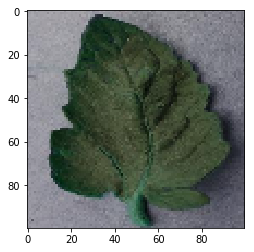

In [6]:
#The sizes of all the photos are different. 
# changing the size of every photo to a constant size to work for CNN

img_size= 100

new_images=cv2.resize(img, (img_size, img_size))  # size of image is 100*100
plt.imshow(new_images)
plt.show()


In [7]:
training_data=[]
def create_training_data():
    for img in os.listdir(train_dir):
        #try:
        label = label_img_chutiya(img)
        path = os.path.join(train_dir,img)
        img=cv2.imread(path, cv2.IMREAD_COLOR)  
        new_images=cv2.resize(img, (img_size, img_size))  # size of image is 100*100
        training_data.append([new_images, label])
        #print(class_num)
        #except Exception as e:
         #   pass

create_training_data()      
print(training_data[0])

[array([[[163, 163, 169],
        [158, 158, 164],
        [163, 163, 169],
        ...,
        [132, 131, 141],
        [126, 125, 135],
        [138, 137, 147]],

       [[162, 162, 168],
        [159, 159, 165],
        [167, 167, 173],
        ...,
        [129, 127, 137],
        [123, 122, 132],
        [128, 127, 137]],

       [[161, 161, 168],
        [165, 165, 171],
        [170, 170, 176],
        ...,
        [132, 131, 141],
        [119, 118, 128],
        [133, 132, 142]],

       ...,

       [[159, 158, 168],
        [138, 137, 147],
        [147, 146, 156],
        ...,
        [ 97,  97, 109],
        [104, 104, 116],
        [100, 100, 112]],

       [[150, 149, 159],
        [153, 152, 162],
        [153, 152, 162],
        ...,
        [102, 102, 114],
        [106, 106, 118],
        [109, 109, 121]],

       [[152, 151, 161],
        [143, 142, 152],
        [158, 157, 167],
        ...,
        [111, 111, 123],
        [104, 104, 116],
        [110, 110, 122]

In [8]:
testing_data = []
def create_test_data():
    
    for img in (os.listdir(test_dir)):
        label = label_image(img)
        path = os.path.join(TEST_DIR, img)
        #img_num = img.split('.')[0]
        
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), np.array(label)])
    #np.save("testing_data.npy", testing_data)
    return testing_data

In [9]:
print(len(training_data))

4000


In [10]:
random.shuffle(training_data)

(4000, 100, 100, 3)
[0. 1. 0. 0.]


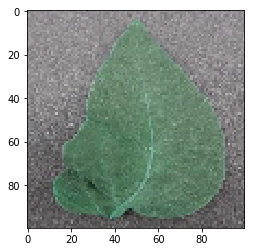

In [11]:
x=[]
y=[]

for features, labels in training_data:
    x.append(features)
    y.append(labels)
plt.imshow(x[0])


#converting the pixels into a numpy array
#-1 for including all the images
# img_size for the image size that we have taken
# 1 since the image has been taken in a grayscale format
x=np.array(x).reshape([-1, img_size, img_size, 3])
print(x.shape)
y=to_categorical(y,4)
y=np.array(y)
print(y[1000])           

In [12]:
#normalising the data by dividing it by the maximum value of pixel

x=x/255.0


In [13]:

#Since the model is Sequential
model=Sequential()


#First Convolutional Layer

#convolving the input layer with a 3*3 filter 
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:]))

#after Convolution, we can either pass activation function of Maxpooling
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convoutional Layer

model.add(Conv2D(64, (3,3)))

model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#Adding the fully connected Layer

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Adding the output Layer
model.add(Dense(4))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])


model.fit(x, y, batch_size=32,epochs=5, validation_split=0.1)
y1=model.predict(x)


Train on 3600 samples, validate on 400 samples
Epoch 1/5
3600/3600 [==============================] - 125s 35ms/step - loss: 0.6160 - acc: 0.7514 - val_loss: 0.5071 - val_acc: 0.8050
Epoch 2/5
3600/3600 [==============================] - 128s 36ms/step - loss: 0.2213 - acc: 0.9233 - val_loss: 0.2043 - val_acc: 0.9300
Epoch 3/5
3600/3600 [==============================] - 125s 35ms/step - loss: 0.1392 - acc: 0.9486 - val_loss: 0.1942 - val_acc: 0.9225
Epoch 4/5
3600/3600 [==============================] - 128s 36ms/step - loss: 0.1030 - acc: 0.9636 - val_loss: 0.1973 - val_acc: 0.9475
Epoch 5/5
3600/3600 [==============================] - 134s 37ms/step - loss: 0.0752 - acc: 0.9750 - val_loss: 0.1415 - val_acc: 0.9650


In [ ]:
#print(y1)
#print(y1.shape)


In [ ]:
'''
# Convert to TensorFlow Lite model.
#converter = tf.lite.TFLiteConverter.from_keras_model_file(keras_file)
converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)'''

In [ ]:

files = os.listdir(test_dir)
filepaths = [os.path.join(test_dir,i) for i in files]
#print(filepaths)
#print("Directory= \n\n\n\n", test_dir.split('/'))
for i in filepaths:
    img = cv2.imread(i)
    try:
        img.shape[2] == 3
    except:
        continue
    cv2.imshow("Before", img)
    cv2.waitKey(0)
    
    out=np.array(img)
    out=cv2.resize(out, (img_size,img_size))
    out=np.array(out).reshape([-1, img_size, img_size, 3])
    y1=model.predict(out)
    #print(y1)

    for i in y1:
        if i[0]==1:
            print("\n\nThecurrent status of the crop is: Healthy \n\nNo further action needed.")
        elif(i[1]==3):
            print("\n\nThe crop is suffering from :Lisianthus\n\nRemedy:-Monitor the field, handpick diseased plants and bury them. \n  Use sticky yellow plastic traps. \n  Spray insecticides such as organophosphates, carbametes during the seedliing stage. \n Use copper fungicites")
        elif(i[2]==1):
            print("\n\nThe crop is suffering from :Bromaliaceae\n\nRemedy:-Discard or destroy any affected plants. \n  Do not compost them. \n  Rotate yoour tomato plants yearly to prevent re-infection next year. \n Use copper fungicites")
        else:
            print("The crop is suffering from :Vitaceae\n\nRemedy:-Discard or destroy any affected plants. \n  Do not compost them. \n  Rotate yoour tomato plants yearly to prevent re-infection next year. \n Use copper fungicites")


